Mackenzie Frackleton

Brenna Manning

Data Science 2016 Final Project

-----

# Investigating Kwadela: Pre & Post Intervention

------



Imports

In [1]:

import pandas as pd
import numpy as np
from datetime import datetime
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
import seaborn as sns
import numpy as np
import pprint as pp
from IPython.display import display

#LOAD DATA
df2013 = pd.read_csv('Kwadela_winter_2013_cleaned.csv')
df2014 = pd.read_csv('Kwadela_winter_2014_cleaned.csv')


/home/brenna/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


### 2013 Data

In [2]:
print df2013.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125475 entries, 0 to 125474
Data columns (total 24 columns):
Unnamed: 0            125475 non-null int64
Dusttraks_(mg/m3)     116559 non-null float64
PM10_(ug/m3)          64669 non-null float64
PM2.5_(ug/m3)         79939 non-null float64
SO2_(ppb)             86106 non-null float64
CO_(ppm)              18618 non-null float64
NO_(ppb)              65526 non-null float64
NO2_(ppb)             65661 non-null float64
Date                  125475 non-null object
Temperature_(degC)    101947 non-null float64
H01-K-E               125288 non-null float64
H02-K-N               105235 non-null float64
H03-K-S               125304 non-null float64
H04-K-S               125275 non-null float64
H05-K-N               122834 non-null float64
H06-K-N               125353 non-null float64
H07-K-S               81779 non-null float64
H10-K-N               125297 non-null float64
H11-K-X               113919 non-null float64
H12-K-N               125

### 2014 Data

In [3]:


print df2014.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97921 entries, 0 to 97920
Data columns (total 29 columns):
Unnamed: 0            97921 non-null int64
Dusttraks_(mg/m3)     48503 non-null float64
PM10_(ug/m3)          36291 non-null float64
PM2.5_(ug/m3)         89135 non-null float64
SO2_(ppb)             61600 non-null float64
CO_(ppm)              89403 non-null float64
NO_(ppb)              84769 non-null float64
NO2_(ppb)             89391 non-null float64
Hour                  97921 non-null int64
Minute                97921 non-null int64
Day                   97921 non-null int64
Month                 97921 non-null int64
Year                  97921 non-null int64
Temperature_(degC)    97920 non-null float64
H01-K-E               97785 non-null float64
H02-K-N               97807 non-null float64
H03-K-S               97802 non-null float64
H04-K-S               97776 non-null float64
H05-K-N               97816 non-null float64
H06-K-N               97797 non-null float64
H07

### Define some useful functions

In [4]:
#SOME HELPER FUNCTIONS
def get_datetime(s):
    dt = datetime.strptime(s, "%m/%d/%y %H:%M")
    return dt

def preprocess(df):
    res = df.copy()
    datetimes = res.Date.apply(get_datetime)
    res['Hour'] = datetimes.apply(lambda dt: dt.hour)
    res['Day'] = datetimes.apply(lambda dt: dt.day)
    res['Month'] = datetimes.apply(lambda dt: dt.month)
    res['Year'] = datetimes.apply(lambda dt: dt.year)
    df['Dusttraks_(mg/m3)']= df['Dusttraks_(mg/m3)']*0.14
    return res
def daysSinceStart(df):
    #get time since epoch
    dayArray = np.array(df.Day)
    monthArray = np.array(df.Month)
    
    runningDays = []
    for day, month in zip(dayArray, monthArray):
        if month == 7:
            total_days = 0
            #do nothing, append the normal day
        elif month == 8:
            total_days = 31 
        elif month == 9:
            total_days = 61
        else:
            raise ValueError 
        total_days = total_days + day
        #print'tot days:', total_days, month, day
        runningDays.append(total_days)
    df['DayCount'] = pd.Series(runningDays, index = df.index)
    return df


#Daily Average Temp
def compute_avg_temp(df):
    df['DailyAverageTemp'] = df['Temperature_(degC)'].mean()
    return df




Preprocess and get temperature averages for each dataframe

In [5]:
df2013['Dusttraks_(mg/m3)']= df2013['Dusttraks_(mg/m3)']*0.14
df2013 = preprocess(df2013)
df2013 = daysSinceStart(df2013)
grouped = df2013.groupby('DayCount')
df2013 = grouped.apply(compute_avg_temp)


#df2014 = preprocess(df2014)
df2014['Dusttraks_(mg/m3)']= df2014['Dusttraks_(mg/m3)']*0.14
df2014 = daysSinceStart(df2014)
grouped = df2014.groupby('DayCount')
df2014 = grouped.apply(compute_avg_temp)



#### Comparing Outdoor Temperatures

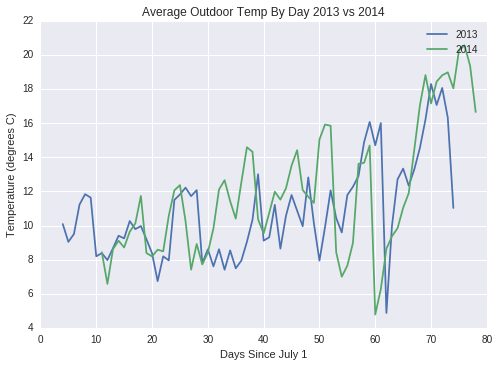

In [6]:
plt.plot(df2013['DayCount'], df2013['DailyAverageTemp'])
plt.plot(df2014['DayCount'], df2014['DailyAverageTemp'])
plt.legend(['2013', '2014'])
plt.title('Average Outdoor Temp By Day 2013 vs 2014')
plt.xlabel('Days Since July 1')
plt.ylabel('Temperature (degrees C)')
plt.show()

#### Function for Diurnal Plots

In [7]:
def getmeanfeatureforhour (hourdf, feature):
    res = hourdf[feature].mean()
    return res
def featurehourplot(df, feature, title):
    #feature for example could be a temperature or pollutant concentration
    dfhour0 = df[df['Hour'] == 0]
    feat0 = getmeanfeatureforhour(dfhour0, feature)
    dfhour1 = df[df['Hour'] == 1]
    feat1= getmeanfeatureforhour(dfhour1, feature)
    dfhour2 = df[df['Hour'] == 2]
    feat2 = getmeanfeatureforhour(dfhour2, feature)
    dfhour3 = df[df['Hour'] == 3]
    feat3 = getmeanfeatureforhour(dfhour3, feature)
    dfhour4 = df[df['Hour'] == 4]
    feat4 = getmeanfeatureforhour(dfhour4, feature)
    dfhour5 = df[df['Hour'] == 5]
    feat5 = getmeanfeatureforhour(dfhour5, feature)
    dfhour6 = df[df['Hour'] == 6]
    feat6 = getmeanfeatureforhour(dfhour6, feature)
    dfhour7 = df[df['Hour'] == 7]
    feat7 = getmeanfeatureforhour(dfhour7, feature)
    dfhour8 = df[df['Hour'] == 8]
    feat8 = getmeanfeatureforhour(dfhour8, feature)
    dfhour9 = df[df['Hour'] == 9]
    feat9 = getmeanfeatureforhour(dfhour9, feature)
    dfhour10 = df[df['Hour'] == 10]
    feat10 = getmeanfeatureforhour(dfhour10, feature)
    dfhour11 = df[df['Hour'] == 11]
    feat11 = getmeanfeatureforhour(dfhour11, feature)
    dfhour12 = df[df['Hour'] == 12]
    feat12 = getmeanfeatureforhour(dfhour12, feature)
    dfhour13 = df[df['Hour'] == 13]
    feat13 = getmeanfeatureforhour(dfhour13, feature)
    dfhour14 = df[df['Hour'] == 14]
    feat14 = getmeanfeatureforhour(dfhour14, feature)
    dfhour15 = df[df['Hour'] == 15]
    feat15 = getmeanfeatureforhour(dfhour15, feature)
    dfhour16 = df[df['Hour'] == 16]
    feat16 = getmeanfeatureforhour(dfhour16, feature)
    dfhour17 = df[df['Hour'] == 17]
    feat17 = getmeanfeatureforhour(dfhour17, feature)
    dfhour18 = df[df['Hour'] == 18]
    feat18 = getmeanfeatureforhour(dfhour18, feature)
    dfhour19 = df[df['Hour'] == 19]
    feat19 = getmeanfeatureforhour(dfhour19, feature)
    dfhour20 = df[df['Hour'] == 20]
    feat20 = getmeanfeatureforhour(dfhour20, feature)
    dfhour21 = df[df['Hour'] == 21]
    feat21 = getmeanfeatureforhour(dfhour21, feature)
    dfhour22 = df[df['Hour'] == 22]
    feat22 = getmeanfeatureforhour(dfhour22, feature)
    dfhour23 = df[df['Hour'] == 23]
    feat23 = getmeanfeatureforhour(dfhour23, feature)

    hourlist = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
    featlist = [feat0,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,feat10,feat11,feat12,feat13,feat14,feat15,feat16,feat17,feat18,feat19,feat20,feat21,feat22,feat23]
    plt.plot(hourlist, featlist,label=title)
    plt.legend
    plt.xlabel('Hour')
    if feature[0:1] == 'H0':
        plt.ylabel('House Temp, Degrees C')
    else:
        plt.ylabel(feature)
    plt.title(title)




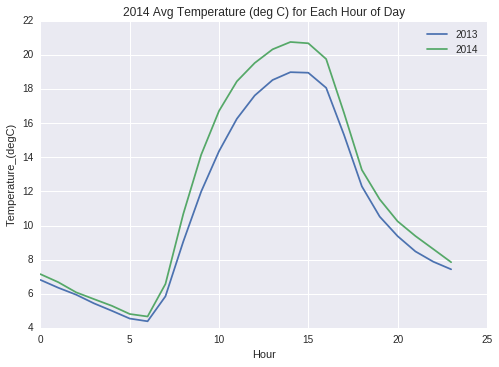

In [8]:
featurehourplot(df2013, 'Temperature_(degC)', ' 2013 Avg Temperature (deg C) for Each Hour of Day')
featurehourplot(df2014, 'Temperature_(degC)', '2014 Avg Temperature (deg C) for Each Hour of Day')
plt.legend(['2013', '2014'])
plt.show()

In [9]:
#GENERAL FUNCTION FOR DIURNAL PLOTS

def getmeanfeatureforhour (hourdf, feature):
    res = hourdf[feature].mean()
    return res
def featurehourplot(df, feature, title):
    #feature for example could be a temperature or pollutant concentration
    dfhour0 = df[df['Hour'] == 0]
    feat0 = getmeanfeatureforhour(dfhour0, feature)
    dfhour1 = df[df['Hour'] == 1]
    feat1= getmeanfeatureforhour(dfhour1, feature)
    dfhour2 = df[df['Hour'] == 2]
    feat2 = getmeanfeatureforhour(dfhour2, feature)
    dfhour3 = df[df['Hour'] == 3]
    feat3 = getmeanfeatureforhour(dfhour3, feature)
    dfhour4 = df[df['Hour'] == 4]
    feat4 = getmeanfeatureforhour(dfhour4, feature)
    dfhour5 = df[df['Hour'] == 5]
    feat5 = getmeanfeatureforhour(dfhour5, feature)
    dfhour6 = df[df['Hour'] == 6]
    feat6 = getmeanfeatureforhour(dfhour6, feature)
    dfhour7 = df[df['Hour'] == 7]
    feat7 = getmeanfeatureforhour(dfhour7, feature)
    dfhour8 = df[df['Hour'] == 8]
    feat8 = getmeanfeatureforhour(dfhour8, feature)
    dfhour9 = df[df['Hour'] == 9]
    feat9 = getmeanfeatureforhour(dfhour9, feature)
    dfhour10 = df[df['Hour'] == 10]
    feat10 = getmeanfeatureforhour(dfhour10, feature)
    dfhour11 = df[df['Hour'] == 11]
    feat11 = getmeanfeatureforhour(dfhour11, feature)
    dfhour12 = df[df['Hour'] == 12]
    feat12 = getmeanfeatureforhour(dfhour12, feature)
    dfhour13 = df[df['Hour'] == 13]
    feat13 = getmeanfeatureforhour(dfhour13, feature)
    dfhour14 = df[df['Hour'] == 14]
    feat14 = getmeanfeatureforhour(dfhour14, feature)
    dfhour15 = df[df['Hour'] == 15]
    feat15 = getmeanfeatureforhour(dfhour15, feature)
    dfhour16 = df[df['Hour'] == 16]
    feat16 = getmeanfeatureforhour(dfhour16, feature)
    dfhour17 = df[df['Hour'] == 17]
    feat17 = getmeanfeatureforhour(dfhour17, feature)
    dfhour18 = df[df['Hour'] == 18]
    feat18 = getmeanfeatureforhour(dfhour18, feature)
    dfhour19 = df[df['Hour'] == 19]
    feat19 = getmeanfeatureforhour(dfhour19, feature)
    dfhour20 = df[df['Hour'] == 20]
    feat20 = getmeanfeatureforhour(dfhour20, feature)
    dfhour21 = df[df['Hour'] == 21]
    feat21 = getmeanfeatureforhour(dfhour21, feature)
    dfhour22 = df[df['Hour'] == 22]
    feat22 = getmeanfeatureforhour(dfhour22, feature)
    dfhour23 = df[df['Hour'] == 23]
    feat23 = getmeanfeatureforhour(dfhour23, feature)

    hourlist = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
    featlist = [feat0,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,feat10,feat11,feat12,feat13,feat14,feat15,feat16,feat17,feat18,feat19,feat20,feat21,feat22,feat23]
    plt.plot(hourlist, featlist, label=title)
    plt.legend
    plt.xlabel('Hour')
    if feature[0:1] == 'H0':
        plt.ylabel('House Temp, Degrees C')
    else:
        plt.ylabel(feature)
    plt.title(title)



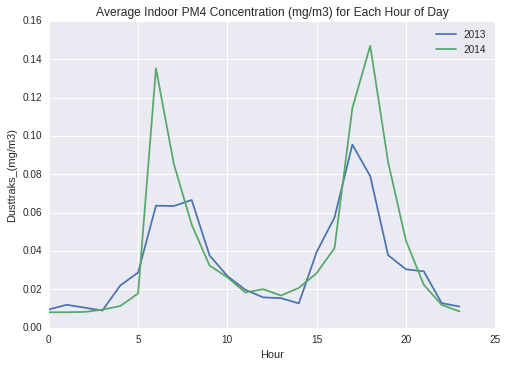

In [10]:
featurehourplot(df2013, 'Dusttraks_(mg/m3)', 'Average Indoor PM4 Concentration (mg/m3) for Each Hour of Day')
featurehourplot(df2014, 'Dusttraks_(mg/m3)', 'Average Indoor PM4 Concentration (mg/m3) for Each Hour of Day')
plt.legend(['2013', '2014'])
plt.show()

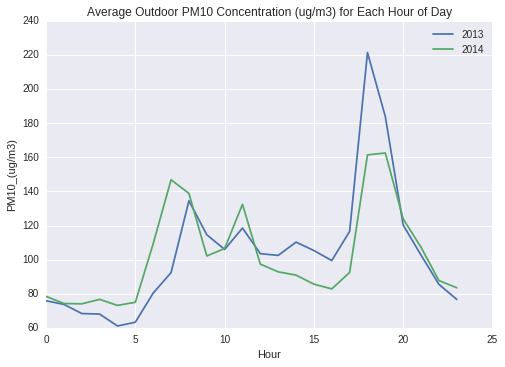

In [11]:
featurehourplot(df2013, 'PM10_(ug/m3)', 'Average Outdoor PM10 Concentration (ug/m3) for Each Hour of Day')
featurehourplot(df2014, 'PM10_(ug/m3)', 'Average Outdoor PM10 Concentration (ug/m3) for Each Hour of Day')
plt.legend(['2013', '2014'])
plt.show()

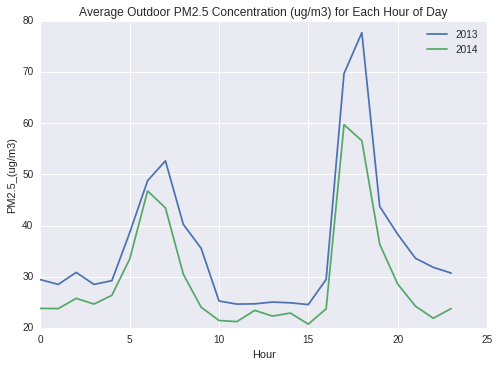

In [12]:
featurehourplot(df2013, 'PM2.5_(ug/m3)', 'Average Outdoor PM2.5 Concentration (ug/m3) for Each Hour of Day')
featurehourplot(df2014, 'PM2.5_(ug/m3)', 'Average Outdoor PM2.5 Concentration (ug/m3) for Each Hour of Day')
plt.legend(['2013', '2014'])
plt.show()

In [13]:
def compute_avg_dusttraks(df):
    df['DailyAvgDusttraks'] = df['Dusttraks_(mg/m3)'].mean()
    return df

grouped2013 = df2013.groupby('DayCount')
df2013 = grouped.apply(compute_avg_dusttraks)

grouped2014 = df2014.groupby('DayCount')
df2014 = grouped.apply(compute_avg_dusttraks)


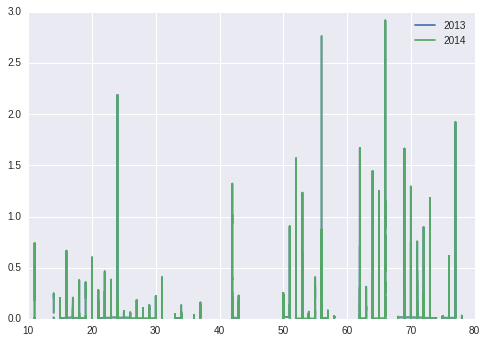

In [14]:
plt.plot(df2013['DayCount'], df2013['Dusttraks_(mg/m3)'])
plt.plot(df2014['DayCount'], df2014['Dusttraks_(mg/m3)'])
plt.legend(['2013', '2014'])
plt.show()            

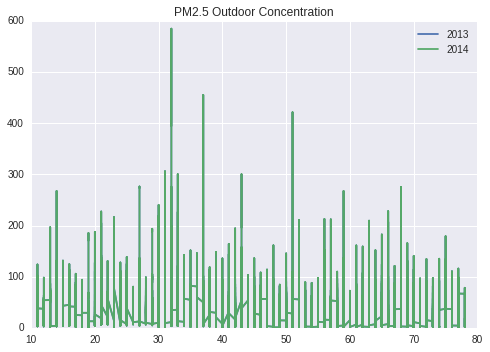

In [15]:
plt.plot(df2013['DayCount'], df2013['PM2.5_(ug/m3)'])
plt.plot(df2014['DayCount'], df2014['PM2.5_(ug/m3)'])
plt.legend(['2013', '2014'])
plt.title('PM2.5 Outdoor Concentration')
plt.show()

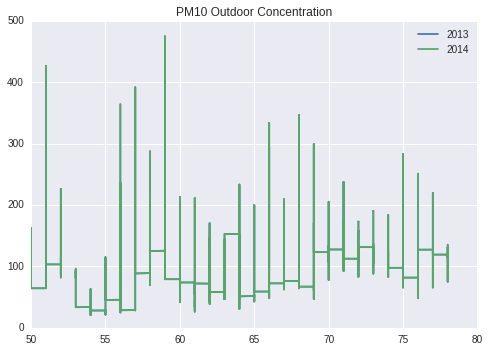

In [16]:
plt.plot(df2013['DayCount'], df2013['PM10_(ug/m3)'])
plt.plot(df2014['DayCount'], df2014['PM10_(ug/m3)'])
plt.legend(['2013', '2014'])
plt.title('PM10 Outdoor Concentration')
plt.show()